# Import library, read csv

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read csv file, encoding = unicode_escape
df = pd.read_csv('D:\DS Proj\diwali_sales_analysis\dataset\Diwali Sales Data.csv', encoding = 'unicode_escape')
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [4]:
# chech if any null values exists
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df['Amount'] = df['Amount'].astype('int64')

# sales count of gender 

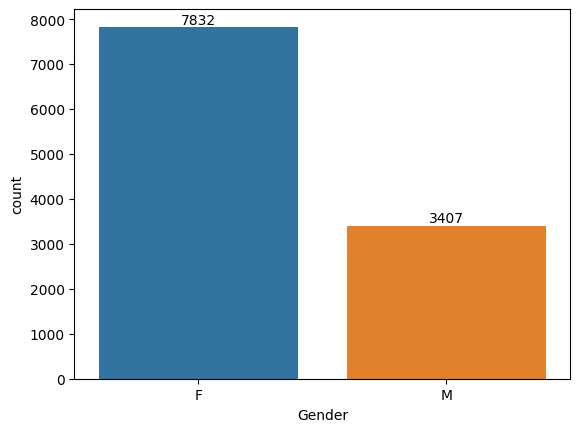

In [7]:
ax = sns.countplot(x='Gender',data=df)

for i in ax.containers:
    ax.bar_label(i)

From above graph we saw that females do more shopping than males

# Total amount generated by gender

In [8]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

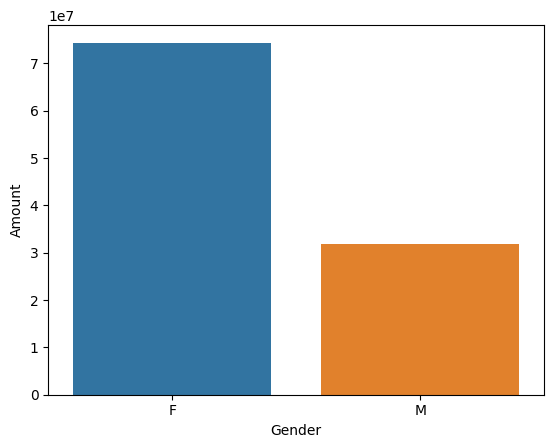

In [9]:
sns.barplot(x='Gender',y='Amount',data = sales_gen)

# Sales count by age group and gender

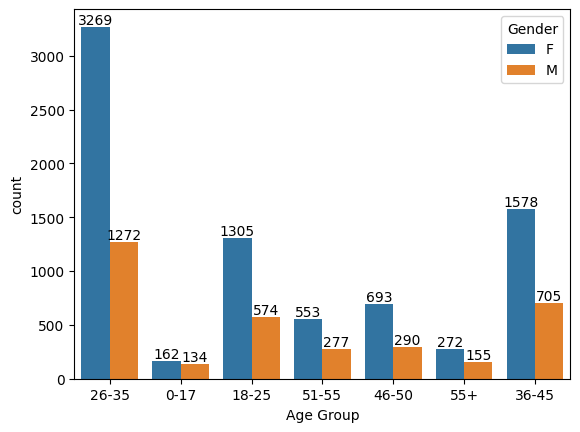

In [10]:
ax = sns.countplot(x = 'Age Group',hue='Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

Age Group from 26 to 35 doing more shopping than others

# Total amount generated by age group

<Axes: xlabel='Age Group', ylabel='Amount'>

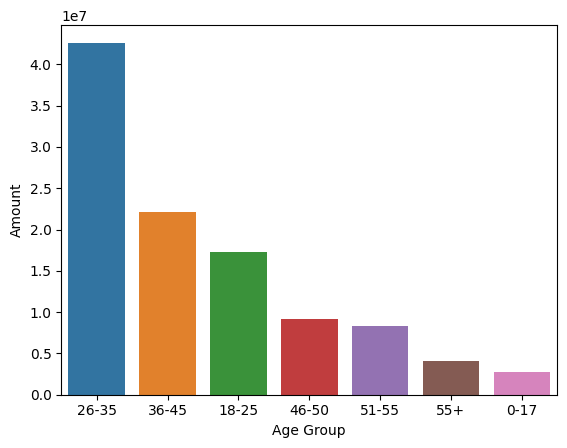

In [11]:
sales_gen_age_grp = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age Group',y='Amount',data=sales_gen_age_grp)

# Total order by state

<Axes: xlabel='State', ylabel='Orders'>

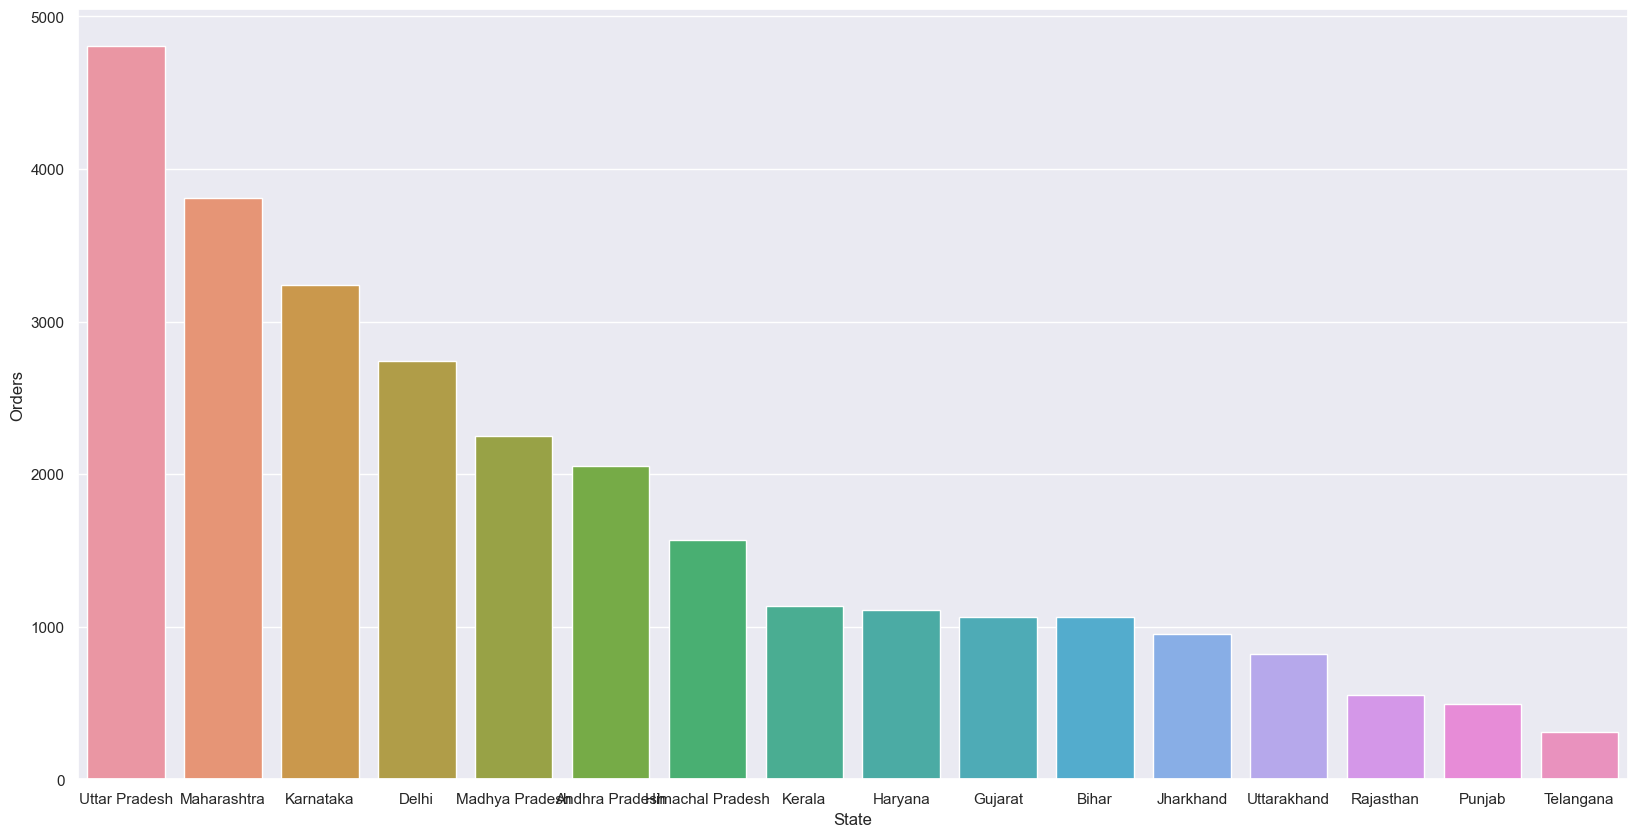

In [12]:
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)

sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x='State',y='Orders',data=sales_state)

# Total amount by state

<Axes: xlabel='State', ylabel='Amount'>

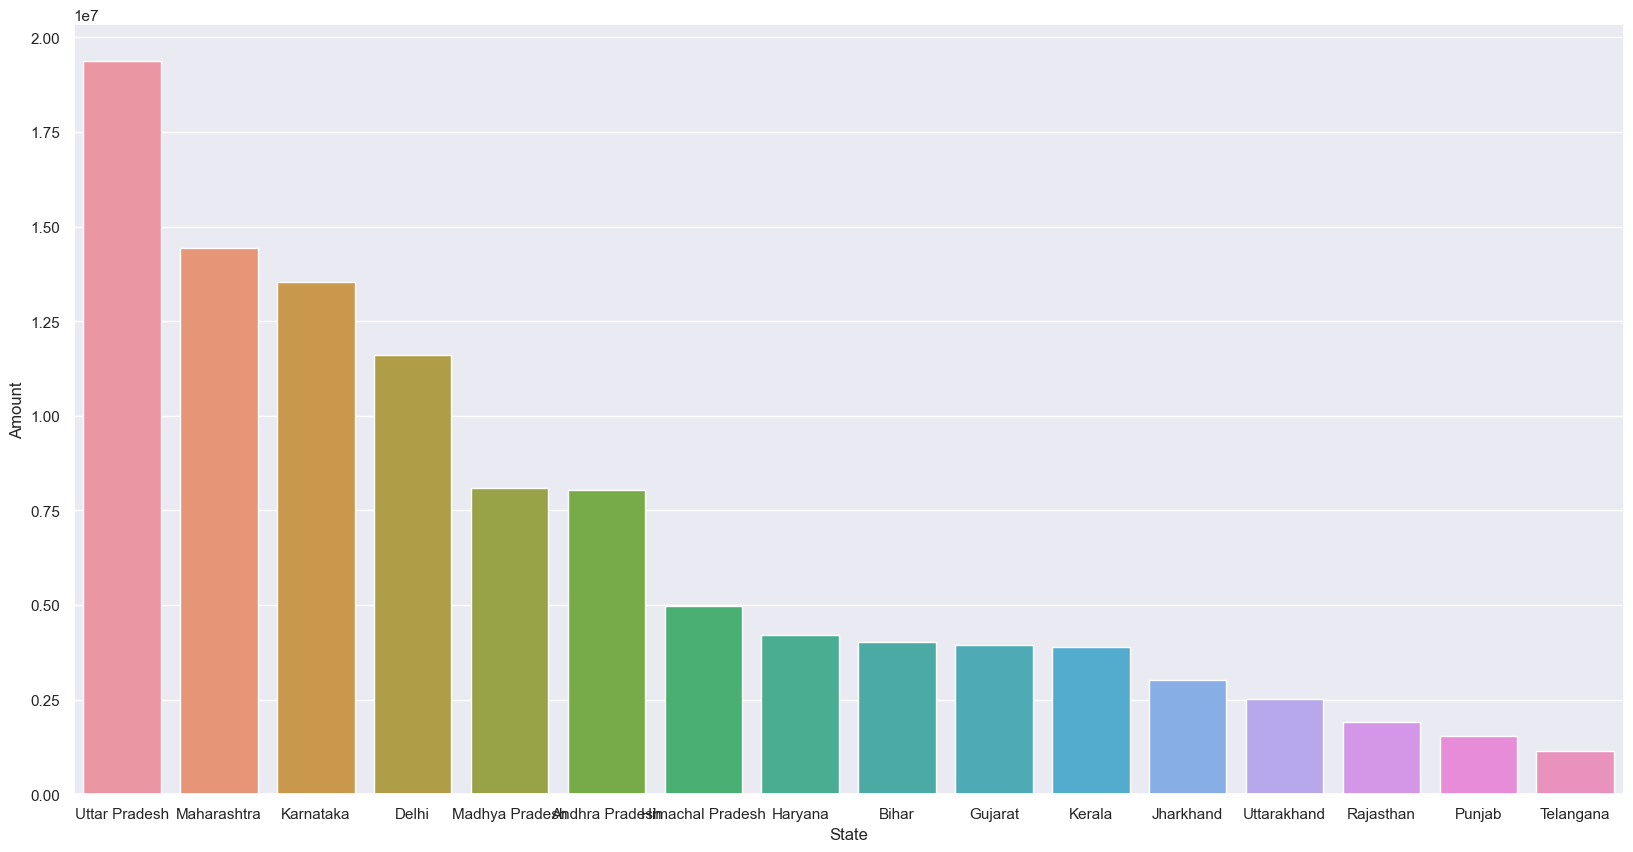

In [13]:
sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x='State',y='Amount',data=sales_state)

from above two graphs we can say that between haryana and kerala, kerala's numbers of order in high but generated amount is lower than haryana

Occupation
IT Sector          14755079
Healthcare         13034586
Aviation           12602298
Banking            10770610
Govt                8517212
Hospitality         6376405
Media               6295832
Automobile          5368596
Chemical            5297436
Lawyer              4981665
Retail              4783170
Food Processing     4070670
Construction        3597511
Textile             3204972
Agriculture         2593087
Name: Amount, dtype: int64


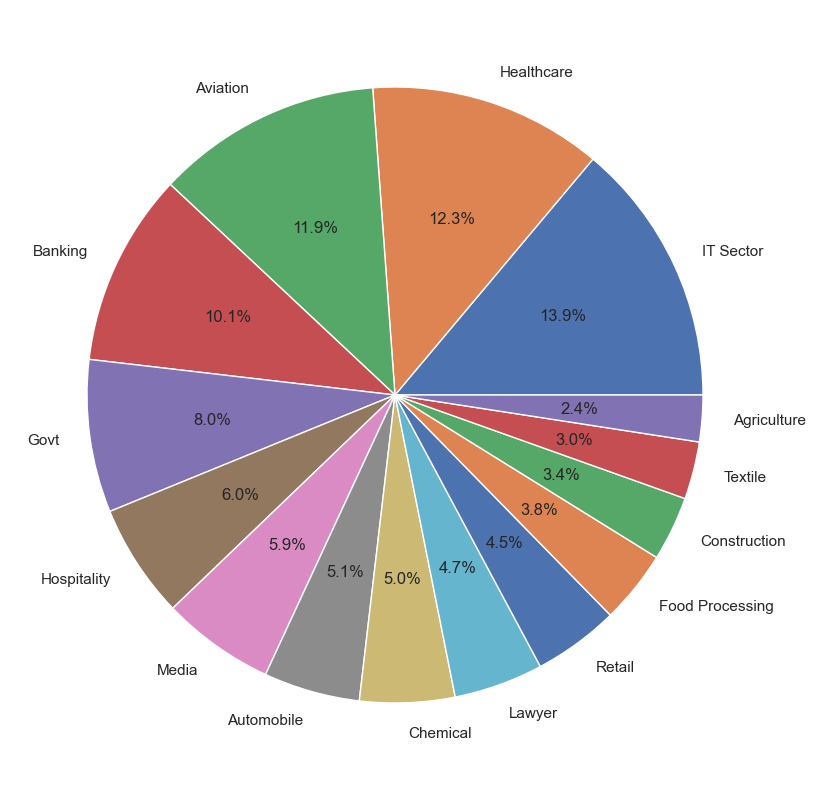

In [34]:
df_occ=df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False)
print(df_occ)

_occ_name = df_occ.index
_occ_amount = df_occ.values

plt.pie(_occ_amount, labels=_occ_name, autopct='%.1f%%')
plt.show()

maximum amount is generated by IT Sector customers then Healthcare and Aviation comes